In [35]:
# EXP15. Compare various OCR models

## 15.0 들어가며

우리는 지금까지 Google OCR API, keras-ocr, Tesseract 이상 3가지의 OCR 기능을 간단히 활용하여 보았습니다.

지금까지 살펴본 바로는 무료로 사용할 수 있는 기능들이지만 모두 준수한 성능을 갖추고 있었습니다. OCR 분야가 이미 실용적인 수준에까지 기술이 발전했기 때문에 이런 것들만 잘 활용해도 실전에 활용할 수 있는 좋은 서비스를 만들어 낼 수 있을 것도 같습니다. 그런데 과연 어떤 것을 사용하는 것이 좋을까요?

OCR 기술들이 실용적인 수준까지 꽤 발전했지만 그럼에도 불구하고 아직 완전한 수준은 아닙니다. 용도에 맞게 적절한 것을 선택하는 것도 중요한 일입니다. 그래서 오늘 다뤄본 위 3가지를 검증해 보는 프로젝트를 진행하겠습니다. 여러분은 OCR 기능을 활용한 서비스를 빠르게 개발해야 하는 임무를 맡은 엔지니어가 되어, 어떤 모듈을 도입하면 좋을지 기술검증을 하는 역할을 맡게 되었다고 가정합니다.

프로젝트를 시작하기 전에 주요 라이브러리 버전을 살펴보죠.

In [36]:
import keras_ocr
import pytesseract
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

print(keras_ocr.__version__) # 왜 버전이 0.0.0으로 뜨지
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.

0.0.0
0.3.9


## 1. 검증용 데이터셋 준비

OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.

가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.

데이터 셋

![1](D:/project/aiffel_exp/data/exp15/project/image/1.jpg)
![2](D:/project/aiffel_exp/data/exp15/project/image/2.jpg)
![3](D:/project/aiffel_exp/data/exp15/project/image/3.jpg)
![4](D:/project/aiffel_exp/data/exp15/project/image/4.jpg)
![5](D:/project/aiffel_exp/data/exp15/project/image/5.jpg)


## 2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

위 두 가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다. 가능하다면 Google OCR API를 포함해 세 가지 모듈을 다 써보세요.




### 2.1 keras-ocr 로 인식하기



#### 2.1.1 keras-ocr 설치하기

* `pip install keras_ocr`

In [37]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\JBY\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\JBY\.keras-ocr\crnn_kurapan.h5


In [38]:
work_dir = 'D:/project/aiffel_exp/data/exp15/project'
img_1 = work_dir + '/image/1.jpg'
img_2 = work_dir + '/image/2.jpg'
img_3 = work_dir + '/image/3.jpg'
img_4 = work_dir + '/image/4.jpg'

image_urls = [img_1, img_2, img_3, img_4]
images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

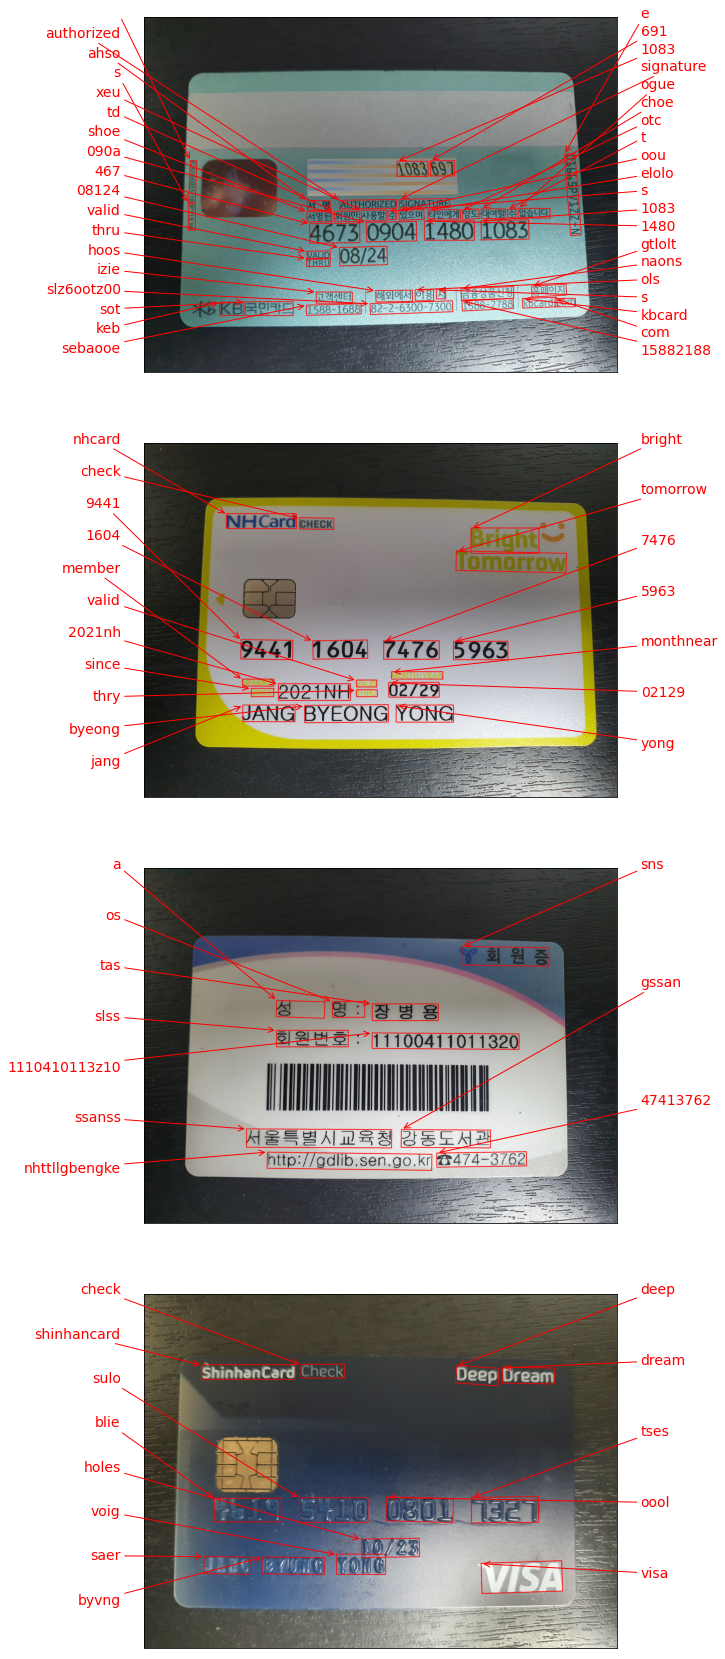

In [39]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(30, 30))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 2.2 Tesseract 로 인식하기

#### 2.2.1 테서랙트 설치하기

* window bulid: tesseract-ocr-w64-setup-v5.0.1.20220118.exe 다운 후 설치
* pip install Pytesseract
* tesseract 환경변수 추가

In [40]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = 'D:/project/aiffel_exp/data/exp15/project/image'
img_file_path = work_dir + '/1.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

D:/project/aiffel_exp/data/exp15/project/image\0000.png
D:/project/aiffel_exp/data/exp15/project/image\0001.png
D:/project/aiffel_exp/data/exp15/project/image\0002.png
D:/project/aiffel_exp/data/exp15/project/image\0003.png
D:/project/aiffel_exp/data/exp15/project/image\0004.png
D:/project/aiffel_exp/data/exp15/project/image\0005.png
D:/project/aiffel_exp/data/exp15/project/image\0006.png
D:/project/aiffel_exp/data/exp15/project/image\0007.png
D:/project/aiffel_exp/data/exp15/project/image\0008.png
D:/project/aiffel_exp/data/exp15/project/image\0009.png
D:/project/aiffel_exp/data/exp15/project/image\0010.png
D:/project/aiffel_exp/data/exp15/project/image\0011.png
D:/project/aiffel_exp/data/exp15/project/image\0012.png
D:/project/aiffel_exp/data/exp15/project/image\0013.png
D:/project/aiffel_exp/data/exp15/project/image\0014.png
D:/project/aiffel_exp/data/exp15/project/image\0015.png
D:/project/aiffel_exp/data/exp15/project/image\0016.png
D:/project/aiffel_exp/data/exp15/project/image\0

In [41]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

A

a.

AUTHORIZED

SIGNATURE

ASI

B/ S10

AFaut

vad

O1O

EFO10}} 74]

OFT .CHOyet

<

BAU.

A674

Q904

1480

1084

eae

08/24

 &

~~


=


tj

Semel

t


tri

“Lj

<<

ane

mJ

™)

i

Pa

. :

Done


In [42]:
#work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/2.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

#img_file_4 = work_dir + '/test01.png'

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

D:/project/aiffel_exp/data/exp15/project/image\0000.png
D:/project/aiffel_exp/data/exp15/project/image\0001.png
D:/project/aiffel_exp/data/exp15/project/image\0002.png
D:/project/aiffel_exp/data/exp15/project/image\0003.png
D:/project/aiffel_exp/data/exp15/project/image\0004.png
D:/project/aiffel_exp/data/exp15/project/image\0005.png
D:/project/aiffel_exp/data/exp15/project/image\0006.png
D:/project/aiffel_exp/data/exp15/project/image\0007.png
D:/project/aiffel_exp/data/exp15/project/image\0008.png
D:/project/aiffel_exp/data/exp15/project/image\0009.png
D:/project/aiffel_exp/data/exp15/project/image\0010.png
D:/project/aiffel_exp/data/exp15/project/image\0011.png
D:/project/aiffel_exp/data/exp15/project/image\0012.png
Ni-

Car

CHECK

9447

1604

(4/76

5963

PO? 1NH

O2/279

JANG

BYEONG

YONG

; 2 | _

Done


In [43]:
#work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/3.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

#img_file_4 = work_dir + '/test01.png'

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

D:/project/aiffel_exp/data/exp15/project/image\0000.png
D:/project/aiffel_exp/data/exp15/project/image\0001.png
D:/project/aiffel_exp/data/exp15/project/image\0002.png
D:/project/aiffel_exp/data/exp15/project/image\0003.png
D:/project/aiffel_exp/data/exp15/project/image\0004.png
D:/project/aiffel_exp/data/exp15/project/image\0005.png
D:/project/aiffel_exp/data/exp15/project/image\0006.png
D:/project/aiffel_exp/data/exp15/project/image\0007.png
D:/project/aiffel_exp/data/exp15/project/image\0008.png
D:/project/aiffel_exp/data/exp15/project/image\0009.png
D:/project/aiffel_exp/data/exp15/project/image\0010.png
D:/project/aiffel_exp/data/exp15/project/image\0011.png
D:/project/aiffel_exp/data/exp15/project/image\0012.png
D:/project/aiffel_exp/data/exp15/project/image\0013.png
D:/project/aiffel_exp/data/exp15/project/image\0014.png
D:/project/aiffel_exp/data/exp15/project/image\0015.png
D:/project/aiffel_exp/data/exp15/project/image\0016.png
D:/project/aiffel_exp/data/exp15/project/image\0

In [44]:
#work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/4.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

#img_file_4 = work_dir + '/test01.png'

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

D:/project/aiffel_exp/data/exp15/project/image\0000.png
D:/project/aiffel_exp/data/exp15/project/image\0001.png
D:/project/aiffel_exp/data/exp15/project/image\0002.png
D:/project/aiffel_exp/data/exp15/project/image\0003.png
D:/project/aiffel_exp/data/exp15/project/image\0004.png

Galcie.

Deep

Dream

| | 4

Done


## 3. 테스트 결과 정리

모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 시각화 방법이 함께 활용된다면 더욱 좋겠군요.

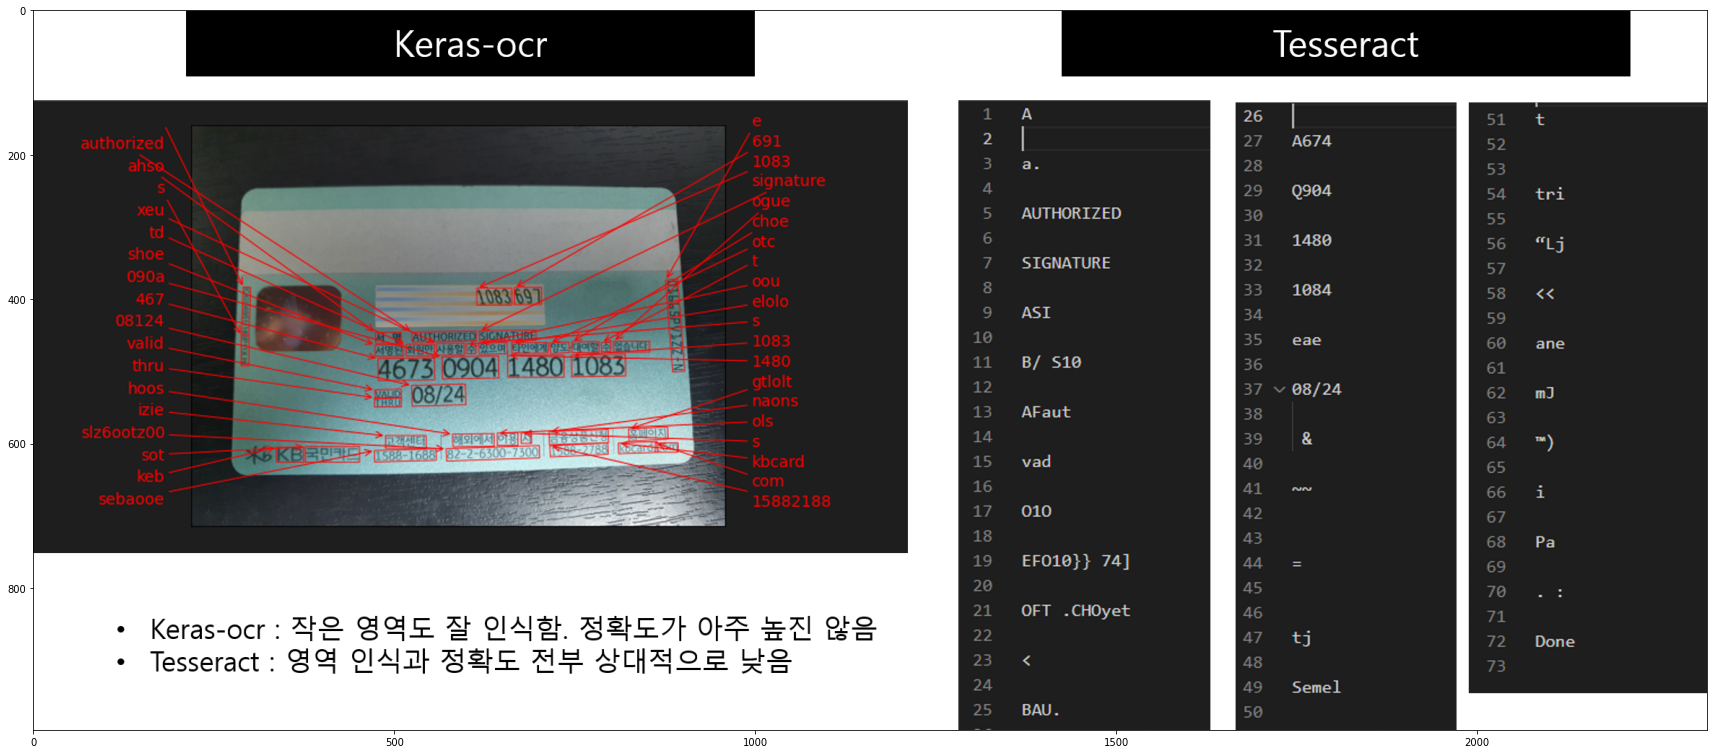

In [46]:
test_result_path1 = 'D:/project/aiffel_exp/data/exp15/project/result/1.png'

test_result1 = plt.imread(test_result_path1)
plt.figure(figsize=(30, 15))
plt.imshow(test_result1 )

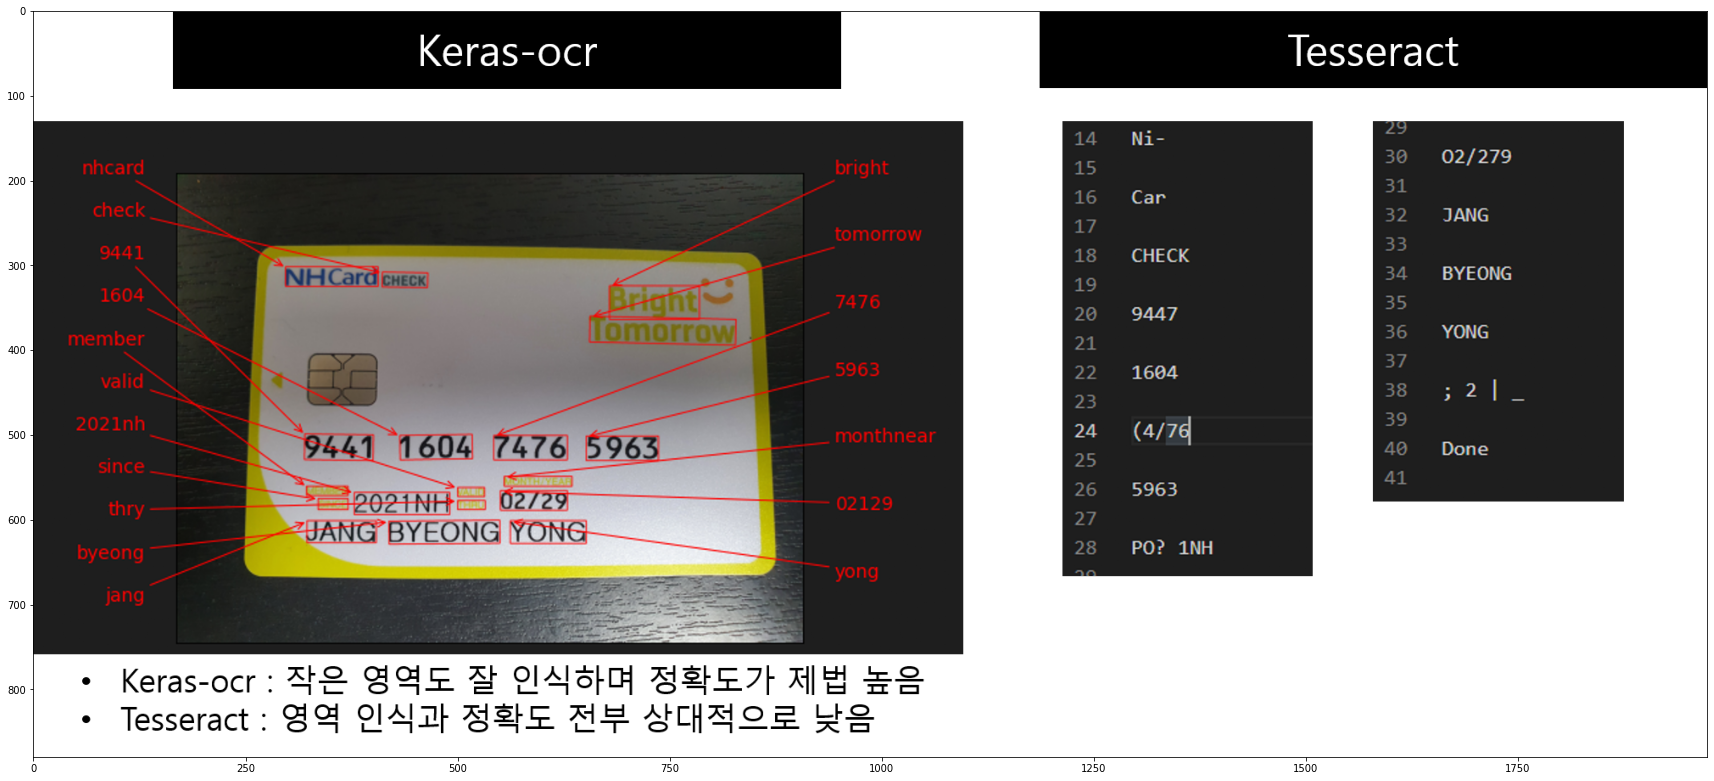

In [47]:
test_result_path2 = 'D:/project/aiffel_exp/data/exp15/project/result/2.png'

test_result2 = plt.imread(test_result_path2)
plt.figure(figsize=(30, 15))
plt.imshow(test_result2 )

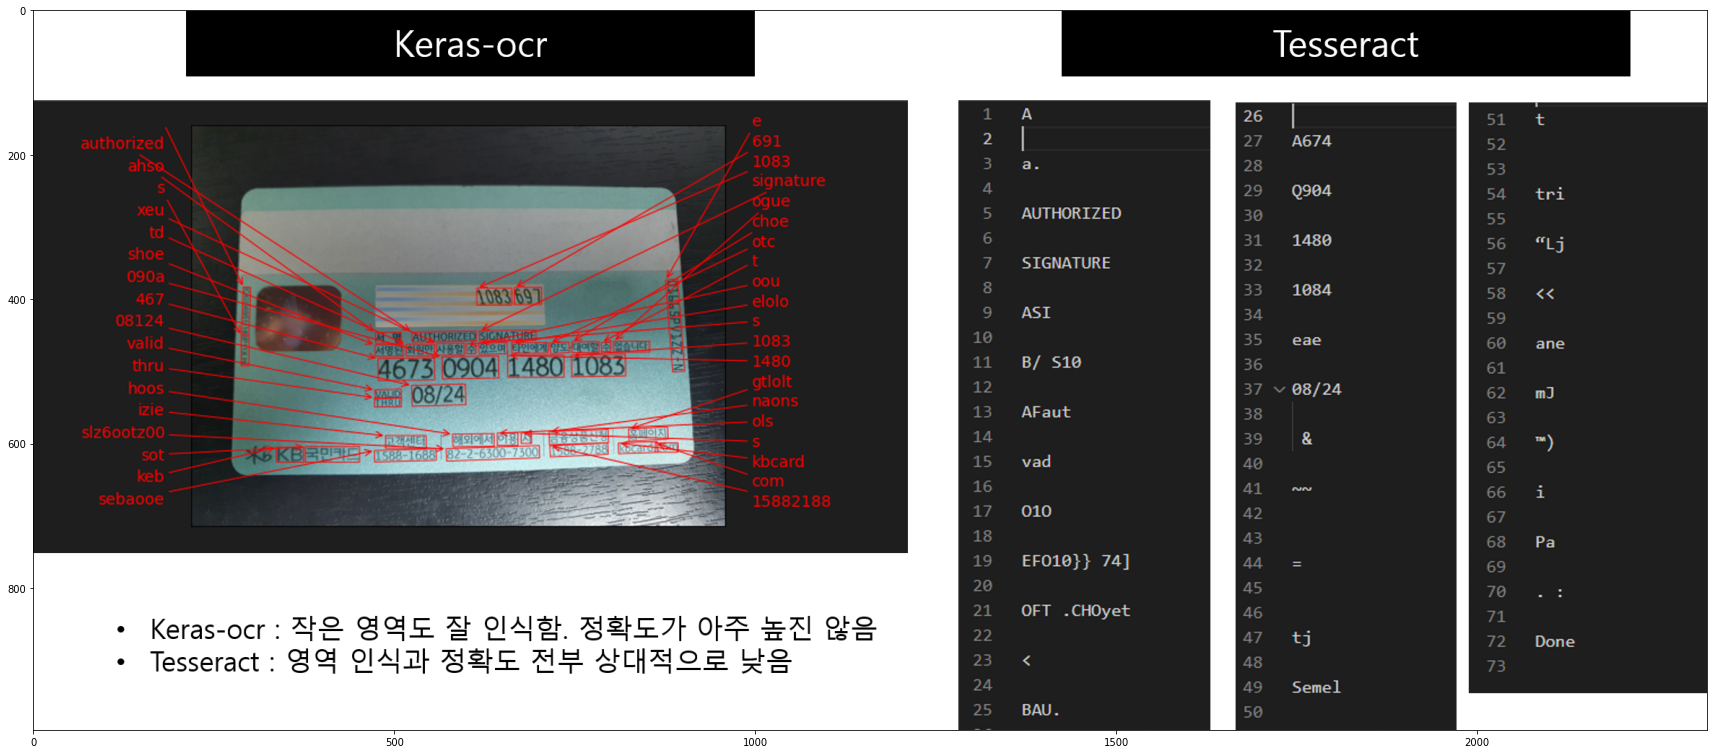

In [48]:
test_result_path3 = 'D:/project/aiffel_exp/data/exp15/project/result/1.png'

test_result3 = plt.imread(test_result_path3)
plt.figure(figsize=(30, 15))
plt.imshow(test_result3 )

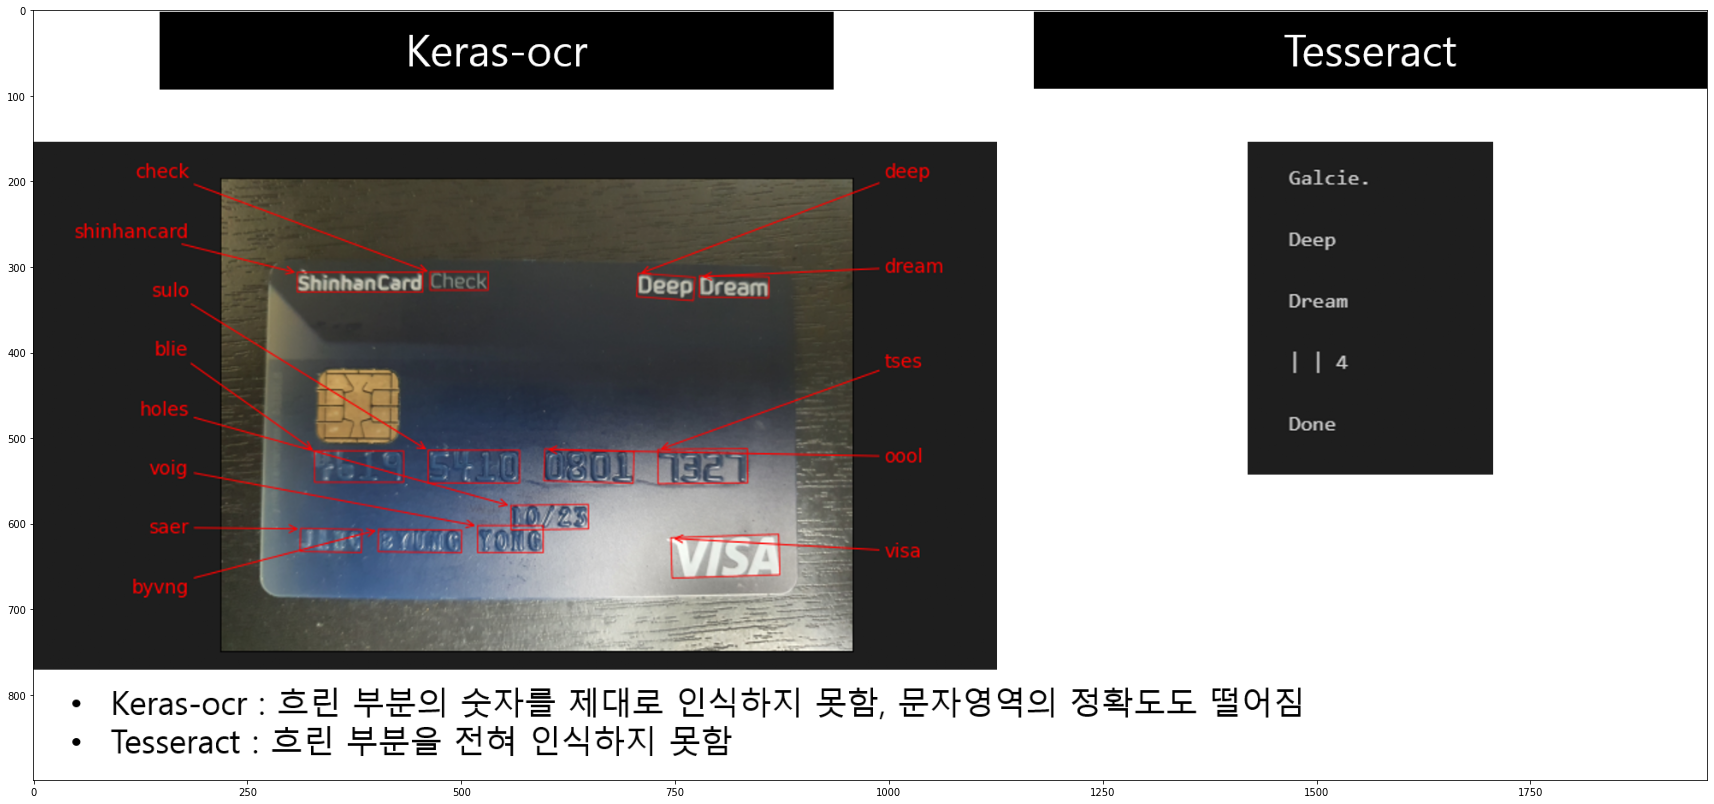

In [49]:
test_result_path4 = 'D:/project/aiffel_exp/data/exp15/project/result/4.png'

test_result4 = plt.imread(test_result_path4)
plt.figure(figsize=(30, 15))
plt.imshow(test_result4 )

## 4. 결과 분석과 결론 제시

우선 여러분들이 구현하고자 하는 서비스 목적과 내용을 먼저 정리합니다. 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시합니다. 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

카드 사진을 읽고, 그 안에서 인식에 필요한 정보들을 정확히 인식하는 정도를 평가

1. keras-ocr
2. Tesseract 
3. google OCR API

**결론**

* 목적: 이미지에서 카드 식별에 필요한 정보를 읽어내어 개인 금융 서비스를 이용 가능하도록 함.
* 평가 기준 : 카드 식별에 필요한 정보인 1) 카드번호, 2) 이름, 3) 발급년도를 정확하게 인식했는가
* 평가 결과: keras-ocr과 Tesseract 모델 전부 카드 식별에 필요한 정보 영역을  명확하게 인식하지 못하거나, 정확도가 상당히 떨어져 사용하기 어려움.

## 5. 느낀점

* OCR 영역에 대해 알 수 있어서 학습 내용은 재밌던 시간이었다. 확실히 이미 상용화가 잘 되어있고, 앞으로 시장 규모도 계속 커질 것 같다.
* 로컬 환경에서 OCR을 세팅하는데, 포기할까 싶은 마음이 들 정도로 헤매서 너무나 고된 시간이었다. 
* 구글 OCR API의 성능이 그렇게 뛰어나다는데, 직접 체험해보지 못해 많이 아쉽다.
* keras-ocr과 tesseract는 exp 내에서 진행한 결과로는 썩 괜찮은 성능을 보여주진 않았다.